<a href="https://colab.research.google.com/github/Anand-s-cmd/ML_Use_cases/blob/main/debugging_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [367]:
df=pd.read_csv('/content/drive/MyDrive/Hospital/Dataset.csv')

In [368]:
df.head(20)

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0          66154       25312          118               0  68.0  22.730000   
1         114252       59342           81               0  77.0  27.420000   
2         119783       50777          118               0  25.0  31.950000   
3          79267       46918          118               0  81.0  22.640000   
4          92056       34377           33               0  19.0        NaN   
5          33181       74489           83               0  67.0  27.560000   
6          82208       49526           83               0  59.0  57.450000   
7         120995       50129           33               0  70.0        NaN   
8          80471       10577          118               1  45.0        NaN   
9          42871       90749          118               0  50.0  25.710000   
10        105427      125898           77               0  72.0  28.257052   
11         91609       78266           83               0  80.0  27.382812   
12         76356       41311          118               0  48.0        NaN   
13         34030      103766          118               0  65.0        NaN   
14        108388       98174          118               0  81.0  38.189067   
15        120677      124688          118               0  78.0        NaN   
16        115771       71252           81               0  30.0  23.383178   
17         22471      112115          118               0  46.0  25.845717   
18         48056      114220          118               0  65.0  28.408929   
19         45954      102946          118               0  39.0  37.010278   

    elective_surgery  ethnicity gender  height hospital_admit_source  \
0                  0  Caucasian      M   180.3                 Floor   
1                  0  Caucasian      F   160.0                 Floor   
2                  0  Caucasian      F   172.7  Emergency Department   
3                  1  Caucasian      F   165.1        Operating Room   
4                  0  Caucasian      M   188.0                   NaN   
5                  0  Caucasian      M   190.5          Direct Admit   
6                  0  Caucasian      F   165.1        Operating Room   
7                  0  Caucasian      M   165.0  Emergency Department   
8                  0  Caucasian      M   170.2        Other Hospital   
9                  0        NaN      M   175.3          Direct Admit   
10                 1   Hispanic      F   154.9        Operating Room   
11                 1  Caucasian      F   160.0        Operating Room   
12                 0  Caucasian      M   175.3  Emergency Department   
13                 1  Caucasian      M   172.7        Operating Room   
14                 1  Caucasian      M   172.7        Operating Room   
15                 0  Caucasian      F   160.0  Emergency Department   
16                 0  Caucasian      M   193.0          Direct Admit   
17                 0   Hispanic      M   167.6  Emergency Department   
18                 0   Hispanic      M   167.6  Emergency Department   
19                 1        NaN      M   177.8        Operating Room   

             icu_admit_source  icu_id icu_stay_type      icu_type  \
0                       Floor      92         admit         CTICU   
1                       Floor      90         admit  Med-Surg ICU   
2        Accident & Emergency      93         admit  Med-Surg ICU   
3   Operating Room / Recovery      92         admit         CTICU   
4        Accident & Emergency      91         admit  Med-Surg ICU   
5        Accident & Emergency      95         admit  Med-Surg ICU   
6        Accident & Emergency      95         admit  Med-Surg ICU   
7        Accident & Emergency      91         admit  Med-Surg ICU   
8              Other Hospital     114         admit     CCU-CTICU   
9        Accident & Emergency     114         admit     CCU-CTICU   
10  Operating Room / Recovery     113         admit  Med-Surg ICU   
11  Operating Room / Rec

In [369]:
df.shape

(91713, 186)

In [370]:
df3=df

In [371]:
#Lets drop Id's
df3.drop('encounter_id',inplace=True,axis=1)
df3.drop('patient_id',inplace=True,axis=1)
df3.drop('hospital_id',inplace=True,axis=1)

In [372]:
df3.shape

(91713, 183)

In [373]:
df3.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'hospital_admit_source', 'icu_admit_source',
       'icu_id',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=183)

##BELOW I HAVE TRIED TWO APPROACHES LIKE ONE IS THROUGH METHD ONE IS THROUGH NORMAL LINES OF CODE 
##BECAUSE 
##JUST WANTED TO KNOW IN THE FUNCTION LAST WHAT IS THE TYPE OF THE VALUE 

df_missing

#APPROACH 1)

In [374]:
# List of normalized Missing values 
#Step 1 Count missing values 
def missing_values_table(df):
        #Extract columns names first
        column=df3.columns

        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #Take the data types
        data_type = df.dtypes

        #Check all the values are having which DATA TYPES
        print(type(column), len(column))
        print(type(mis_val), len(mis_val))
        print(type(mis_val_percent), len(mis_val_percent))
        print(type(data_type), len(data_type))

        #(columns) is <class 'pandas.core.indexes.base.Index'> so we should convert it to Series using [idx.to_series()] method
        column1=column.to_series()

        print("After converting columns to series",type(column1))

        
        # Make a table with the results
        mis_val_table = pd.concat([column1, mis_val, mis_val_percent,data_type], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'column1', 1 : 'Missing Values', 2 : '% of Total Values',3:'Data_Types'})
        
        # Sort the table by percentage of missing descending
        #mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        #
        # WE SHOULD USE THIS CODE mis_val_table_ren_columns.iloc[:,1] != 0] BECAUSE THERE ARE FEW COLUMNS WHICH DOES NOT HAVE ANY SINGLE 0 VALUES
        # IF WE USE THIS CODE THEN THEY GET DROPPED SO BETTER WILL AVOID THIS CODE
        #
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [375]:
missing_values_table(df3)

<class 'pandas.core.indexes.base.Index'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
After converting columns to series <class 'pandas.core.series.Series'>
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


column1  Missing Values  \
h1_bilirubin_min                            h1_bilirubin_min           84619   
h1_bilirubin_max                            h1_bilirubin_max           84619   
h1_lactate_min                                h1_lactate_min           84369   
h1_lactate_max                                h1_lactate_max           84369   
h1_albumin_max                                h1_albumin_max           83824   
h1_albumin_min                                h1_albumin_min           83824   
h1_pao2fio2ratio_min                    h1_pao2fio2ratio_min           80195   
h1_pao2fio2ratio_max                    h1_pao2fio2ratio_max           80195   
h1_arterial_ph_min                        h1_arterial_ph_min           76424   
h1_arterial_ph_max                        h1_arterial_ph_max           76424   
h1_hco3_min                                      h1_hco3_min           76094   
h1_hco3_max                                      h1_hco3_max           76094   
h1_arterial_pco2_min                    h1_arterial_pco2_min           75959   
h1_arterial_pco2_max                    h1_arterial_pco2_max           75959   
h1_wbc_max                                        h1_wbc_max           75953   
h1_wbc_min                                        h1_wbc_min           75953   
h1_arterial_po2_max                      h1_arterial_po2_max           75945   
h1_arterial_po2_min                      h1_arterial_po2_min           75945   
h1_calcium_max                                h1_calcium_max           75863   
h1_calcium_min                                h1_calcium_min           75863   
h1_platelets_max                            h1_platelets_max           75673   
h1_platelets_min                            h1_platelets_min           75673   
h1_bun_min                                        h1_bun_min           75091   
h1_bun_max                                        h1_bun_max           75091   
h1_creatinine_min                          h1_creatinine_min           74957   
h1_creatinine_max                          h1_creatinine_max           74957   
h1_diasbp_invasive_min                h1_diasbp_invasive_min           74928   
h1_diasbp_invasive_max                h1_diasbp_invasive_max           74928   
h1_sysbp_invasive_min                  h1_sysbp_invasive_min           74915   
h1_sysbp_invasive_max                  h1_sysbp_invasive_max           74915   
h1_mbp_invasive_max                      h1_mbp_invasive_max           74844   
h1_mbp_invasive_min                      h1_mbp_invasive_min           74844   
h1_hematocrit_max                          h1_hematocrit_max           73420   
h1_hematocrit_min                          h1_hematocrit_min           73420   
h1_hemaglobin_max                          h1_hemaglobin_max           73123   
h1_hemaglobin_min                          h1_hemaglobin_min           73123   
h1_sodium_min                                  h1_sodium_min           72617   
h1_sodium_max                                  h1_sodium_max           72617   
h1_potassium_min                            h1_potassium_min           72102   
h1_potassium_max                            h1_potassium_max           72102   
fio2_apache                                      fio2_apache           70868   
ph_apache                                          ph_apache           70868   
paco2_apache                                    paco2_apache           70868   
pao2_apache                                      pao2_apache           70868   
paco2_for_ph_apache                      paco2_for_ph_apache           70868   
d1_lactate_max                                d1_lactate_max           68396   
d1_lactate_min                                d1_lactate_min           68396   
d1_diasbp_invasive_max                d1_diasbp_invasive_max           67984   
d1_diasbp_invasive_min                d1_diasbp_invasive_min           67984   
d1_sysbp_invasive_min                  d1_sysbp_invas

In [376]:
df_missing= missing_values_table(df3)

<class 'pandas.core.indexes.base.Index'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
<class 'pandas.core.series.Series'> 183
After converting columns to series <class 'pandas.core.series.Series'>
Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


In [377]:
df_missing

column1  Missing Values  \
h1_bilirubin_min                            h1_bilirubin_min           84619   
h1_bilirubin_max                            h1_bilirubin_max           84619   
h1_lactate_min                                h1_lactate_min           84369   
h1_lactate_max                                h1_lactate_max           84369   
h1_albumin_max                                h1_albumin_max           83824   
h1_albumin_min                                h1_albumin_min           83824   
h1_pao2fio2ratio_min                    h1_pao2fio2ratio_min           80195   
h1_pao2fio2ratio_max                    h1_pao2fio2ratio_max           80195   
h1_arterial_ph_min                        h1_arterial_ph_min           76424   
h1_arterial_ph_max                        h1_arterial_ph_max           76424   
h1_hco3_min                                      h1_hco3_min           76094   
h1_hco3_max                                      h1_hco3_max           76094   
h1_arterial_pco2_min                    h1_arterial_pco2_min           75959   
h1_arterial_pco2_max                    h1_arterial_pco2_max           75959   
h1_wbc_max                                        h1_wbc_max           75953   
h1_wbc_min                                        h1_wbc_min           75953   
h1_arterial_po2_max                      h1_arterial_po2_max           75945   
h1_arterial_po2_min                      h1_arterial_po2_min           75945   
h1_calcium_max                                h1_calcium_max           75863   
h1_calcium_min                                h1_calcium_min           75863   
h1_platelets_max                            h1_platelets_max           75673   
h1_platelets_min                            h1_platelets_min           75673   
h1_bun_min                                        h1_bun_min           75091   
h1_bun_max                                        h1_bun_max           75091   
h1_creatinine_min                          h1_creatinine_min           74957   
h1_creatinine_max                          h1_creatinine_max           74957   
h1_diasbp_invasive_min                h1_diasbp_invasive_min           74928   
h1_diasbp_invasive_max                h1_diasbp_invasive_max           74928   
h1_sysbp_invasive_min                  h1_sysbp_invasive_min           74915   
h1_sysbp_invasive_max                  h1_sysbp_invasive_max           74915   
h1_mbp_invasive_max                      h1_mbp_invasive_max           74844   
h1_mbp_invasive_min                      h1_mbp_invasive_min           74844   
h1_hematocrit_max                          h1_hematocrit_max           73420   
h1_hematocrit_min                          h1_hematocrit_min           73420   
h1_hemaglobin_max                          h1_hemaglobin_max           73123   
h1_hemaglobin_min                          h1_hemaglobin_min           73123   
h1_sodium_min                                  h1_sodium_min           72617   
h1_sodium_max                                  h1_sodium_max           72617   
h1_potassium_min                            h1_potassium_min           72102   
h1_potassium_max                            h1_potassium_max           72102   
fio2_apache                                      fio2_apache           70868   
ph_apache                                          ph_apache           70868   
paco2_apache                                    paco2_apache           70868   
pao2_apache                                      pao2_apache           70868   
paco2_for_ph_apache                      paco2_for_ph_apache           70868   
d1_lactate_max                                d1_lactate_max           68396   
d1_lactate_min                                d1_lactate_min           68396   
d1_diasbp_invasive_max                d1_diasbp_invasive_max           67984   
d1_diasbp_invasive_min                d1_diasbp_invasive_min           67984   
d1_sysbp_invasive_min                  d1_sysbp_invas

In [378]:
type(df_missing)

pandas.core.frame.DataFrame

In [379]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column1            183 non-null    object 
 1   Missing Values     183 non-null    int64  
 2   % of Total Values  183 non-null    float64
 3   Data_Types         183 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.1+ KB


In [380]:
df_missing['Missing Values']=df_missing['Missing Values'].astype(int)
df_missing['% of Total Values']=df_missing['% of Total Values'].astype(int)

In [381]:
#df_filtered = df[df['Age'] >= 25]
#print(df_filtered.head(15)
# Print the shape of the dataframe
#print(df_filtered.shape)

df_missing.drop(df_missing[df_missing['% of Total Values'] >= 80].index, inplace = True)

In [382]:
df_missing.shape

(149, 4)

In [383]:
df_missing.tail()

column1  Missing Values  \
icu_stay_type                  icu_stay_type               0   
icu_type                            icu_type               0   
readmission_status        readmission_status               0   
apache_post_operative  apache_post_operative               0   
hospital_death                hospital_death               0   

                       % of Total Values Data_Types  
icu_stay_type                          0     object  
icu_type                               0     object  
readmission_status                     0      int64  
apache_post_operative                  0      int64  
hospital_death                         0      int64

In [384]:
#reset the index
df_missing=df_missing.reset_index(drop=True)

In [385]:
df_missing.head()

column1  Missing Values  % of Total Values Data_Types
0  h1_hemaglobin_max           73123                 79    float64
1  h1_hemaglobin_min           73123                 79    float64
2      h1_sodium_min           72617                 79    float64
3      h1_sodium_max           72617                 79    float64
4   h1_potassium_min           72102                 78    float64

In [386]:
df_missing['column1'].values

array(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max',
       'fio2_apache', 'ph_apache', 'paco2_apache', 'pao2_apache',
       'paco2_for_ph_apache', 'd1_lactate_max', 'd1_lactate_min',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_sysbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_pao2fio2ratio_min', 'd1_pao2fio2ratio_max',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_pco2_min',
       'd1_arterial_pco2_max', 'd1_arterial_po2_min',
       'd1_arterial_po2_max', 'bilirubin_apache', 'h1_inr_min',
       'h1_inr_max', 'd1_inr_max', 'd1_inr_min', 'albumin_apache',
       'd1_bilirubin_max', 'd1_bilirubin_min', 'h1_glucose_max',
       'h1_glucose_min', 'd1_albumin_min', 'd1_albumin_max',
       'urineoutput_apache', 'wbc_apache', 'h1_temp_min', 'h1_temp_max',
       'hospital_admit_source', 'hematocrit_apache', 'b

In [387]:
len(df_missing['column1'].values)

149

In [388]:
after_removed_column_list=df_missing['column1'].values

In [389]:
type(after_removed_column_list)

numpy.ndarray

In [390]:
df4=df

In [391]:
df4[after_removed_column_list].head()

h1_hemaglobin_max  h1_hemaglobin_min  h1_sodium_min  h1_sodium_max  \
0                NaN                NaN            NaN            NaN   
1               11.3               11.3          145.0          145.0   
2                NaN                NaN            NaN            NaN   
3               11.6               11.6            NaN            NaN   
4                NaN                NaN            NaN            NaN   

   h1_potassium_min  h1_potassium_max  fio2_apache  ph_apache  paco2_apache  \
0               NaN               NaN          NaN        NaN           NaN   
1               4.2               4.2          1.0       7.45          37.0   
2               NaN               NaN          NaN        NaN           NaN   
3               NaN               NaN          0.6       7.39          30.0   
4               NaN               NaN          NaN        NaN           NaN   

   pao2_apache  paco2_for_ph_apache  d1_lactate_max  d1_lactate_min  \
0          NaN                  NaN             1.3             1.0   
1         51.0                 37.0             3.5             3.5   
2          NaN                  NaN             NaN             NaN   
3        142.0                 30.0             NaN             NaN   
4          NaN                  NaN             NaN             NaN   

   d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_sysbp_invasive_min  \
0                    46.0                    32.0                   64.0   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                    62.0                    30.0                   78.0   
4                     NaN                     NaN                    NaN   

   d1_sysbp_invasive_max  d1_mbp_invasive_max  d1_mbp_invasive_min  \
0                  122.0                 66.0                 40.0   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                  164.0                 92.0                 52.0   
4                    NaN                  NaN                  NaN   

   d1_pao2fio2ratio_min  d1_pao2fio2ratio_max  d1_arterial_ph_max  \
0                   NaN                   NaN                 NaN   
1             51.000000                  54.8                7.45   
2                   NaN                   NaN                 NaN   
3            236.666667                 342.5                7.44   
4                   NaN                   NaN                 NaN   

   d1_arterial_ph_min  d1_arterial_pco2_min  d1_arterial_pco2_max  \
0                 NaN                   NaN                   NaN   
1                7.45                  37.0                  37.0   
2                 NaN                   NaN                   NaN   
3                7.34                  27.0                  37.0   
4                 NaN                   NaN                   NaN   

   d1_arterial_po2_min  d1_arterial_po2_max  bilirubin_apache  h1_inr_min  \
0                  NaN                  NaN               0.4         NaN   
1                 51.0                 51.0               NaN         1.3   
2                  NaN                  NaN               NaN         NaN   
3                102.0                337.0               NaN         1.1   
4                  NaN                  NaN               NaN         NaN   

   h1_inr_max  d1_inr_max  d1_inr_min  albumin_apache  d1_bilirubin_max  \
0         NaN         NaN         NaN             2.3               0.4   
1         1.3         1.3         1.3             NaN               0.5   
2         NaN         NaN         NaN             NaN               NaN   
3         1.6         1.6         1.1             NaN               NaN   
4         NaN         NaN         NaN             NaN               NaN   

   d1_bilirubin_min  h1_glucose_max  h1_

In [392]:
df5=df4[after_removed_column_list]

In [393]:
df5.shape

(91713, 149)

##Data Analysis We will Analyze To Find out the below stuff
#Missing Values
Here we will check the percentage of nan values present in each feature

1 -step make the list of features which has missing values

In [394]:
features_with_na=[features for features in df5.columns if df5[features].isnull().sum()>1]

In [395]:
type(features_with_na)

list

In [396]:
for feature in features_with_na:
    print(feature, np.round(df5[feature].isnull().mean()*100, 4),'%')

h1_hemaglobin_max 79.7302 %
h1_hemaglobin_min 79.7302 %
h1_sodium_min 79.1785 %
h1_sodium_max 79.1785 %
h1_potassium_min 78.617 %
h1_potassium_max 78.617 %
fio2_apache 77.2715 %
ph_apache 77.2715 %
paco2_apache 77.2715 %
pao2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
d1_lactate_max 74.5761 %
d1_lactate_min 74.5761 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_sysbp_invasive_min 74.0996 %
d1_sysbp_invasive_max 74.0996 %
d1_mbp_invasive_max 73.9012 %
d1_mbp_invasive_min 73.9012 %
d1_pao2fio2ratio_min 71.9723 %
d1_pao2fio2ratio_max 71.9723 %
d1_arterial_ph_max 65.5556 %
d1_arterial_ph_min 65.5556 %
d1_arterial_pco2_min 64.6266 %
d1_arterial_pco2_max 64.6266 %
d1_arterial_po2_min 64.6168 %
d1_arterial_po2_max 64.6168 %
bilirubin_apache 63.3869 %
h1_inr_min 63.1764 %
h1_inr_max 63.1764 %
d1_inr_max 63.1764 %
d1_inr_min 63.1764 %
albumin_apache 59.2926 %
d1_bilirubin_max 58.5228 %
d1_bilirubin_min 58.5228 %
h1_glucose_max 57.3681 %
h1_glucose_min 57.3681 %
d1_al

##Numerical Variables

In [397]:
# list of numerical variables
numerical_features = [feature for feature in df5.columns if df5[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df5[numerical_features].head()

Number of numerical variables:  141


h1_hemaglobin_max  h1_hemaglobin_min  h1_sodium_min  h1_sodium_max  \
0                NaN                NaN            NaN            NaN   
1               11.3               11.3          145.0          145.0   
2                NaN                NaN            NaN            NaN   
3               11.6               11.6            NaN            NaN   
4                NaN                NaN            NaN            NaN   

   h1_potassium_min  h1_potassium_max  fio2_apache  ph_apache  paco2_apache  \
0               NaN               NaN          NaN        NaN           NaN   
1               4.2               4.2          1.0       7.45          37.0   
2               NaN               NaN          NaN        NaN           NaN   
3               NaN               NaN          0.6       7.39          30.0   
4               NaN               NaN          NaN        NaN           NaN   

   pao2_apache  paco2_for_ph_apache  d1_lactate_max  d1_lactate_min  \
0          NaN                  NaN             1.3             1.0   
1         51.0                 37.0             3.5             3.5   
2          NaN                  NaN             NaN             NaN   
3        142.0                 30.0             NaN             NaN   
4          NaN                  NaN             NaN             NaN   

   d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_sysbp_invasive_min  \
0                    46.0                    32.0                   64.0   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                    62.0                    30.0                   78.0   
4                     NaN                     NaN                    NaN   

   d1_sysbp_invasive_max  d1_mbp_invasive_max  d1_mbp_invasive_min  \
0                  122.0                 66.0                 40.0   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                  164.0                 92.0                 52.0   
4                    NaN                  NaN                  NaN   

   d1_pao2fio2ratio_min  d1_pao2fio2ratio_max  d1_arterial_ph_max  \
0                   NaN                   NaN                 NaN   
1             51.000000                  54.8                7.45   
2                   NaN                   NaN                 NaN   
3            236.666667                 342.5                7.44   
4                   NaN                   NaN                 NaN   

   d1_arterial_ph_min  d1_arterial_pco2_min  d1_arterial_pco2_max  \
0                 NaN                   NaN                   NaN   
1                7.45                  37.0                  37.0   
2                 NaN                   NaN                   NaN   
3                7.34                  27.0                  37.0   
4                 NaN                   NaN                   NaN   

   d1_arterial_po2_min  d1_arterial_po2_max  bilirubin_apache  h1_inr_min  \
0                  NaN                  NaN               0.4         NaN   
1                 51.0                 51.0               NaN         1.3   
2                  NaN                  NaN               NaN         NaN   
3                102.0                337.0               NaN         1.1   
4                  NaN                  NaN               NaN         NaN   

   h1_inr_max  d1_inr_max  d1_inr_min  albumin_apache  d1_bilirubin_max  \
0         NaN         NaN         NaN             2.3               0.4   
1         1.3         1.3         1.3             NaN               0.5   
2         NaN         NaN         NaN             NaN               NaN   
3         1.6         1.6         1.1             NaN               NaN   
4         NaN         NaN         NaN             NaN               NaN   

   d1_bilirubin_min  h1_glucose_max  h1_

In [398]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

##Numerical variables are usually of 2 type
1. Continous variable and
2. Discrete Variables

In [399]:
discrete_feature=[feature for feature in numerical_features if len(df5[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 19


In [400]:
discrete_feature

['gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'gcs_unable_apache',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'cirrhosis',
 'aids',
 'immunosuppression',
 'leukemia',
 'ventilated_apache',
 'intubated_apache',
 'arf_apache',
 'lymphoma',
 'hepatic_failure',
 'elective_surgery',
 'readmission_status',
 'apache_post_operative',
 'hospital_death']

In [401]:
df5[discrete_feature].head()

gcs_verbal_apache  gcs_motor_apache  gcs_eyes_apache  gcs_unable_apache  \
0                4.0               6.0              3.0                0.0   
1                1.0               3.0              1.0                0.0   
2                5.0               6.0              3.0                0.0   
3                5.0               6.0              4.0                0.0   
4                NaN               NaN              NaN                NaN   

   diabetes_mellitus  solid_tumor_with_metastasis  cirrhosis  aids  \
0                1.0                          0.0        0.0   0.0   
1                1.0                          0.0        0.0   0.0   
2                0.0                          0.0        0.0   0.0   
3                0.0                          0.0        0.0   0.0   
4                0.0                          0.0        0.0   0.0   

   immunosuppression  leukemia  ventilated_apache  intubated_apache  \
0                0.0       0.0                0.0               0.0   
1                0.0       0.0                1.0               0.0   
2                0.0       0.0                0.0               0.0   
3                0.0       0.0                1.0               1.0   
4                0.0       0.0                0.0               0.0   

   arf_apache  lymphoma  hepatic_failure  elective_surgery  \
0         0.0       0.0              0.0                 0   
1         0.0       0.0              0.0                 0   
2         0.0       0.0              0.0                 0   
3         0.0       0.0              0.0                 1   
4         0.0       0.0              0.0                 0   

   readmission_status  apache_post_operative  hospital_death  
0                   0                      0               0  
1                   0                      0               0  
2                   0                      0               0  
3                   0                      1               0  
4                   0                      0               0

In [402]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['encounter_id'+'patient_id	']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 122


##Categorical Variables

In [403]:
categorical_features=[feature for feature in df5.columns if df5[feature].dtypes=='O']
categorical_features

['hospital_admit_source',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'ethnicity',
 'icu_admit_source',
 'gender',
 'icu_stay_type',
 'icu_type']

In [404]:
df5[categorical_features].head()

hospital_admit_source apache_3j_bodysystem apache_2_bodysystem  ethnicity  \
0                 Floor               Sepsis      Cardiovascular  Caucasian   
1                 Floor          Respiratory         Respiratory  Caucasian   
2  Emergency Department            Metabolic           Metabolic  Caucasian   
3        Operating Room       Cardiovascular      Cardiovascular  Caucasian   
4                   NaN               Trauma              Trauma  Caucasian   

            icu_admit_source gender icu_stay_type      icu_type  
0                      Floor      M         admit         CTICU  
1                      Floor      F         admit  Med-Surg ICU  
2       Accident & Emergency      F         admit  Med-Surg ICU  
3  Operating Room / Recovery      F         admit         CTICU  
4       Accident & Emergency      M         admit  Med-Surg ICU

In [405]:
print("total features are now should be 149 lets see now the result ---->",len(discrete_feature)+len(continuous_feature)+len(categorical_features))

total features are now should be 149 lets see now the result ----> 149


In [406]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df5[feature].unique())))

The feature is hospital_admit_source and number of categories are 16
The feature is apache_3j_bodysystem and number of categories are 12
The feature is apache_2_bodysystem and number of categories are 11
The feature is ethnicity and number of categories are 7
The feature is icu_admit_source and number of categories are 6
The feature is gender and number of categories are 3
The feature is icu_stay_type and number of categories are 3
The feature is icu_type and number of categories are 8


In [407]:
df5[discrete_feature].isnull().sum()

gcs_verbal_apache              1901
gcs_motor_apache               1901
gcs_eyes_apache                1901
gcs_unable_apache              1037
diabetes_mellitus               715
solid_tumor_with_metastasis     715
cirrhosis                       715
aids                            715
immunosuppression               715
leukemia                        715
ventilated_apache               715
intubated_apache                715
arf_apache                      715
lymphoma                        715
hepatic_failure                 715
elective_surgery                  0
readmission_status                0
apache_post_operative             0
hospital_death                    0
dtype: int64

In [408]:
print("discrete_feature length",len(discrete_feature))
print("continuous_feature length",len(continuous_feature))
print("categorical_features length",len(categorical_features))

discrete_feature length 19
continuous_feature length 122
categorical_features length 8


##Missing Value Imputation 

##1. Categorical data

In [409]:
df5[categorical_features].head(20)

hospital_admit_source apache_3j_bodysystem apache_2_bodysystem  ethnicity  \
0                  Floor               Sepsis      Cardiovascular  Caucasian   
1                  Floor          Respiratory         Respiratory  Caucasian   
2   Emergency Department            Metabolic           Metabolic  Caucasian   
3         Operating Room       Cardiovascular      Cardiovascular  Caucasian   
4                    NaN               Trauma              Trauma  Caucasian   
5           Direct Admit         Neurological          Neurologic  Caucasian   
6         Operating Room          Respiratory         Respiratory  Caucasian   
7   Emergency Department               Sepsis      Cardiovascular  Caucasian   
8         Other Hospital       Cardiovascular      Cardiovascular  Caucasian   
9           Direct Admit       Cardiovascular      Cardiovascular        NaN   
10        Operating Room          Respiratory         Respiratory   Hispanic   
11        Operating Room         Neurological          Neurologic  Caucasian   
12  Emergency Department         Neurological          Neurologic  Caucasian   
13        Operating Room     Gastrointestinal    Gastrointestinal  Caucasian   
14        Operating Room          Respiratory         Respiratory  Caucasian   
15  Emergency Department               Sepsis      Cardiovascular  Caucasian   
16          Direct Admit       Cardiovascular      Cardiovascular  Caucasian   
17  Emergency Department          Respiratory         Respiratory   Hispanic   
18  Emergency Department         Neurological          Neurologic   Hispanic   
19        Operating Room       Cardiovascular      Cardiovascular        NaN   

             icu_admit_source gender icu_stay_type      icu_type  
0                       Floor      M         admit         CTICU  
1                       Floor      F         admit  Med-Surg ICU  
2        Accident & Emergency      F         admit  Med-Surg ICU  
3   Operating Room / Recovery      F         admit         CTICU  
4        Accident & Emergency      M         admit  Med-Surg ICU  
5        Accident & Emergency      M         admit  Med-Surg ICU  
6        Accident & Emergency      F         admit  Med-Surg ICU  
7        Accident & Emergency      M         admit  Med-Surg ICU  
8              Other Hospital      M         admit     CCU-CTICU  
9        Accident & Emergency      M         admit     CCU-CTICU  
10  Operating Room / Recovery      F         admit  Med-Surg ICU  
11  Operating Room / Recovery      F         admit  Med-Surg ICU  
12       Accident & Emergency      M         admit     Neuro ICU  
13  Operating Room / Recovery      M         admit  Med-Surg ICU  
14  Operating Room / Recovery      M         admit          MICU  
15       Accident & Emergency      F         admit          MICU  
16       Accident & Emergency      M         admit  Med-Surg ICU  
17       Accident & Emergency      M         admit         CTICU  
18       Accident & Emergency      M         admit     Neuro ICU  
19  Operating Room / Recovery      M         admit         CTICU

In [410]:
df5[categorical_features].isnull().sum()

hospital_admit_source    21409
apache_3j_bodysystem      1662
apache_2_bodysystem       1662
ethnicity                 1395
icu_admit_source           112
gender                      25
icu_stay_type                0
icu_type                     0
dtype: int64

In [416]:
df5['hospital_admit_source'].fillna(df5['hospital_admit_source'].mode()[0], axis=0,inplace=True)
df5['apache_3j_bodysystem'].fillna(df5['apache_3j_bodysystem'].mode()[0], axis=0,inplace=True)
df5['apache_2_bodysystem'].fillna(df5['apache_2_bodysystem'].mode()[0], axis=0,inplace=True)
df5['ethnicity'].fillna(df5['ethnicity'].mode()[0], axis=0,inplace=True)
df5['icu_admit_source'].fillna(df5['icu_admit_source'].mode()[0], axis=0,inplace=True)
df5['gender'].fillna(df5['gender'].mode()[0], axis=0,inplace=True)

In [417]:
df5[categorical_features].head(20)

hospital_admit_source apache_3j_bodysystem apache_2_bodysystem  ethnicity  \
0                  Floor               Sepsis      Cardiovascular  Caucasian   
1                  Floor          Respiratory         Respiratory  Caucasian   
2   Emergency Department            Metabolic           Metabolic  Caucasian   
3         Operating Room       Cardiovascular      Cardiovascular  Caucasian   
4   Emergency Department               Trauma              Trauma  Caucasian   
5           Direct Admit         Neurological          Neurologic  Caucasian   
6         Operating Room          Respiratory         Respiratory  Caucasian   
7   Emergency Department               Sepsis      Cardiovascular  Caucasian   
8         Other Hospital       Cardiovascular      Cardiovascular  Caucasian   
9           Direct Admit       Cardiovascular      Cardiovascular  Caucasian   
10        Operating Room          Respiratory         Respiratory   Hispanic   
11        Operating Room         Neurological          Neurologic  Caucasian   
12  Emergency Department         Neurological          Neurologic  Caucasian   
13        Operating Room     Gastrointestinal    Gastrointestinal  Caucasian   
14        Operating Room          Respiratory         Respiratory  Caucasian   
15  Emergency Department               Sepsis      Cardiovascular  Caucasian   
16          Direct Admit       Cardiovascular      Cardiovascular  Caucasian   
17  Emergency Department          Respiratory         Respiratory   Hispanic   
18  Emergency Department         Neurological          Neurologic   Hispanic   
19        Operating Room       Cardiovascular      Cardiovascular  Caucasian   

             icu_admit_source gender icu_stay_type      icu_type  
0                       Floor      M         admit         CTICU  
1                       Floor      F         admit  Med-Surg ICU  
2        Accident & Emergency      F         admit  Med-Surg ICU  
3   Operating Room / Recovery      F         admit         CTICU  
4        Accident & Emergency      M         admit  Med-Surg ICU  
5        Accident & Emergency      M         admit  Med-Surg ICU  
6        Accident & Emergency      F         admit  Med-Surg ICU  
7        Accident & Emergency      M         admit  Med-Surg ICU  
8              Other Hospital      M         admit     CCU-CTICU  
9        Accident & Emergency      M         admit     CCU-CTICU  
10  Operating Room / Recovery      F         admit  Med-Surg ICU  
11  Operating Room / Recovery      F         admit  Med-Surg ICU  
12       Accident & Emergency      M         admit     Neuro ICU  
13  Operating Room / Recovery      M         admit  Med-Surg ICU  
14  Operating Room / Recovery      M         admit          MICU  
15       Accident & Emergency      F         admit          MICU  
16       Accident & Emergency      M         admit  Med-Surg ICU  
17       Accident & Emergency      M         admit         CTICU  
18       Accident & Emergency      M         admit     Neuro ICU  
19  Operating Room / Recovery      M         admit         CTICU

In [418]:
df6[categorical_features].isnull().sum()

hospital_admit_source    0
apache_3j_bodysystem     0
apache_2_bodysystem      0
ethnicity                0
icu_admit_source         0
gender                   0
icu_stay_type            0
icu_type                 0
dtype: int64

##2. Continuous data

In [419]:
df5[continuous_feature].isnull().sum()

h1_hemaglobin_max                73123
h1_hemaglobin_min                73123
h1_sodium_min                    72617
h1_sodium_max                    72617
h1_potassium_min                 72102
h1_potassium_max                 72102
fio2_apache                      70868
ph_apache                        70868
paco2_apache                     70868
pao2_apache                      70868
paco2_for_ph_apache              70868
d1_lactate_max                   68396
d1_lactate_min                   68396
d1_diasbp_invasive_max           67984
d1_diasbp_invasive_min           67984
d1_sysbp_invasive_min            67959
d1_sysbp_invasive_max            67959
d1_mbp_invasive_max              67777
d1_mbp_invasive_min              67777
d1_pao2fio2ratio_min             66008
d1_pao2fio2ratio_max             66008
d1_arterial_ph_max               60123
d1_arterial_ph_min               60123
d1_arterial_pco2_min             59271
d1_arterial_pco2_max             59271
d1_arterial_po2_min      

In [420]:
for feature in continuous_feature:
    print(feature, np.round(df5[feature].isnull().mean()*100, 4),'%')

h1_hemaglobin_max 79.7302 %
h1_hemaglobin_min 79.7302 %
h1_sodium_min 79.1785 %
h1_sodium_max 79.1785 %
h1_potassium_min 78.617 %
h1_potassium_max 78.617 %
fio2_apache 77.2715 %
ph_apache 77.2715 %
paco2_apache 77.2715 %
pao2_apache 77.2715 %
paco2_for_ph_apache 77.2715 %
d1_lactate_max 74.5761 %
d1_lactate_min 74.5761 %
d1_diasbp_invasive_max 74.1269 %
d1_diasbp_invasive_min 74.1269 %
d1_sysbp_invasive_min 74.0996 %
d1_sysbp_invasive_max 74.0996 %
d1_mbp_invasive_max 73.9012 %
d1_mbp_invasive_min 73.9012 %
d1_pao2fio2ratio_min 71.9723 %
d1_pao2fio2ratio_max 71.9723 %
d1_arterial_ph_max 65.5556 %
d1_arterial_ph_min 65.5556 %
d1_arterial_pco2_min 64.6266 %
d1_arterial_pco2_max 64.6266 %
d1_arterial_po2_min 64.6168 %
d1_arterial_po2_max 64.6168 %
bilirubin_apache 63.3869 %
h1_inr_min 63.1764 %
h1_inr_max 63.1764 %
d1_inr_max 63.1764 %
d1_inr_min 63.1764 %
albumin_apache 59.2926 %
d1_bilirubin_max 58.5228 %
d1_bilirubin_min 58.5228 %
h1_glucose_max 57.3681 %
h1_glucose_min 57.3681 %
d1_al

In [287]:
df6=df5 # Thisis becausenow we will check the dataframes missing values by comparing both
        # By previous and after imputation  

In [421]:
df6[continuous_feature]=df5[continuous_feature].interpolate(method ='linear', limit_direction ='forward')
df6[continuous_feature]=df5[continuous_feature].interpolate(method ='linear', limit_direction ='both')

In [422]:
df6[continuous_feature].isnull().sum()

h1_hemaglobin_max                0
h1_hemaglobin_min                0
h1_sodium_min                    0
h1_sodium_max                    0
h1_potassium_min                 0
h1_potassium_max                 0
fio2_apache                      0
ph_apache                        0
paco2_apache                     0
pao2_apache                      0
paco2_for_ph_apache              0
d1_lactate_max                   0
d1_lactate_min                   0
d1_diasbp_invasive_max           0
d1_diasbp_invasive_min           0
d1_sysbp_invasive_min            0
d1_sysbp_invasive_max            0
d1_mbp_invasive_max              0
d1_mbp_invasive_min              0
d1_pao2fio2ratio_min             0
d1_pao2fio2ratio_max             0
d1_arterial_ph_max               0
d1_arterial_ph_min               0
d1_arterial_pco2_min             0
d1_arterial_pco2_max             0
d1_arterial_po2_min              0
d1_arterial_po2_max              0
bilirubin_apache                 0
h1_inr_min          

##3. discrete_feature data

In [423]:
df6[discrete_feature].isnull().sum()

gcs_verbal_apache              0
gcs_motor_apache               0
gcs_eyes_apache                0
gcs_unable_apache              0
diabetes_mellitus              0
solid_tumor_with_metastasis    0
cirrhosis                      0
aids                           0
immunosuppression              0
leukemia                       0
ventilated_apache              0
intubated_apache               0
arf_apache                     0
lymphoma                       0
hepatic_failure                0
elective_surgery               0
readmission_status             0
apache_post_operative          0
hospital_death                 0
dtype: int64

In [424]:
df6[discrete_feature]=df5[discrete_feature].interpolate(method ='linear', limit_direction ='forward')
df6[discrete_feature]=df5[discrete_feature].interpolate(method ='linear', limit_direction ='both')

In [425]:
df6[discrete_feature].isnull().sum()

gcs_verbal_apache              0
gcs_motor_apache               0
gcs_eyes_apache                0
gcs_unable_apache              0
diabetes_mellitus              0
solid_tumor_with_metastasis    0
cirrhosis                      0
aids                           0
immunosuppression              0
leukemia                       0
ventilated_apache              0
intubated_apache               0
arf_apache                     0
lymphoma                       0
hepatic_failure                0
elective_surgery               0
readmission_status             0
apache_post_operative          0
hospital_death                 0
dtype: int64

In [426]:
df7 = df6.copy()

In [427]:
df6.shape

(91713, 149)

In [428]:
df7.shape

(91713, 149)

In [429]:
df6.isnull().sum()

h1_hemaglobin_max                0
h1_hemaglobin_min                0
h1_sodium_min                    0
h1_sodium_max                    0
h1_potassium_min                 0
h1_potassium_max                 0
fio2_apache                      0
ph_apache                        0
paco2_apache                     0
pao2_apache                      0
paco2_for_ph_apache              0
d1_lactate_max                   0
d1_lactate_min                   0
d1_diasbp_invasive_max           0
d1_diasbp_invasive_min           0
d1_sysbp_invasive_min            0
d1_sysbp_invasive_max            0
d1_mbp_invasive_max              0
d1_mbp_invasive_min              0
d1_pao2fio2ratio_min             0
d1_pao2fio2ratio_max             0
d1_arterial_ph_max               0
d1_arterial_ph_min               0
d1_arterial_pco2_min             0
d1_arterial_pco2_max             0
d1_arterial_po2_min              0
d1_arterial_po2_max              0
bilirubin_apache                 0
h1_inr_min          

In [430]:
df7.isnull().sum()

h1_hemaglobin_max                0
h1_hemaglobin_min                0
h1_sodium_min                    0
h1_sodium_max                    0
h1_potassium_min                 0
h1_potassium_max                 0
fio2_apache                      0
ph_apache                        0
paco2_apache                     0
pao2_apache                      0
paco2_for_ph_apache              0
d1_lactate_max                   0
d1_lactate_min                   0
d1_diasbp_invasive_max           0
d1_diasbp_invasive_min           0
d1_sysbp_invasive_min            0
d1_sysbp_invasive_max            0
d1_mbp_invasive_max              0
d1_mbp_invasive_min              0
d1_pao2fio2ratio_min             0
d1_pao2fio2ratio_max             0
d1_arterial_ph_max               0
d1_arterial_ph_min               0
d1_arterial_pco2_min             0
d1_arterial_pco2_max             0
d1_arterial_po2_min              0
d1_arterial_po2_max              0
bilirubin_apache                 0
h1_inr_min          

#Here import points are
1. **CATEGORICAL FEATURE WILL HAVE DATA TYPES ONLY OBJECT**
2. **CONTINUOUS AND DISCRETE FEATURES WILL HAVE INT64 & FLOAT64 DATA TYPES WE SHOULD DIFFERENTIATE THOSE COLUMNS**

In [431]:
discrete_feature_with_float = [feature for feature in df7[discrete_feature].columns if df7[feature].dtypes == 'float64']
discrete_feature_with_float

['gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'gcs_unable_apache',
 'diabetes_mellitus',
 'solid_tumor_with_metastasis',
 'cirrhosis',
 'aids',
 'immunosuppression',
 'leukemia',
 'ventilated_apache',
 'intubated_apache',
 'arf_apache',
 'lymphoma',
 'hepatic_failure']

In [432]:
discrete_feature_with_int = [feature for feature in df7[discrete_feature].columns if df7[feature].dtypes == 'int64']
discrete_feature_with_int

['elective_surgery',
 'readmission_status',
 'apache_post_operative',
 'hospital_death']

In [433]:
#df5[continuous_feature]
continuous_feature_with_float = [feature for feature in df7[continuous_feature].columns if df7[feature].dtypes == 'float64']
continuous_feature_with_float

['h1_hemaglobin_max',
 'h1_hemaglobin_min',
 'h1_sodium_min',
 'h1_sodium_max',
 'h1_potassium_min',
 'h1_potassium_max',
 'fio2_apache',
 'ph_apache',
 'paco2_apache',
 'pao2_apache',
 'paco2_for_ph_apache',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_sysbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_pao2fio2ratio_min',
 'd1_pao2fio2ratio_max',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_pco2_min',
 'd1_arterial_pco2_max',
 'd1_arterial_po2_min',
 'd1_arterial_po2_max',
 'bilirubin_apache',
 'h1_inr_min',
 'h1_inr_max',
 'd1_inr_max',
 'd1_inr_min',
 'albumin_apache',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'h1_glucose_max',
 'h1_glucose_min',
 'd1_albumin_min',
 'd1_albumin_max',
 'urineoutput_apache',
 'wbc_apache',
 'h1_temp_min',
 'h1_temp_max',
 'hematocrit_apache',
 'bun_apache',
 'creatinine_apache',
 'sodium_apache',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_pla

In [434]:
continuous_feature_with_int = [feature for feature in df7[continuous_feature].columns if df7[feature].dtypes == 'int64']
continuous_feature_with_int

['icu_id']

In [435]:
categorical_feature_with_obj = [feature for feature in df7[categorical_features].columns if df7[feature].dtypes == 'object']
categorical_feature_with_obj

['hospital_admit_source',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'ethnicity',
 'icu_admit_source',
 'gender',
 'icu_stay_type',
 'icu_type']

In [436]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    print("i val-----",i)
    print("j val-----",j)
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    

i val----- icu_id
j val----- 0


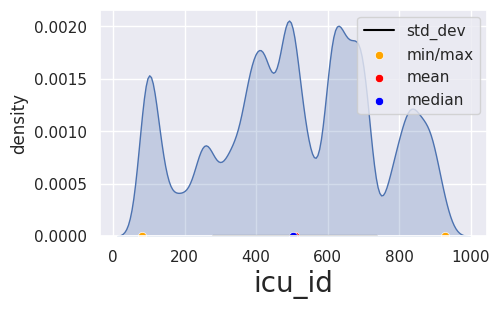

In [437]:
UVA_numeric(df7, continuous_feature_with_int)

i val----- h1_hemaglobin_max
j val----- 0
i val----- h1_hemaglobin_min
j val----- 1
i val----- h1_sodium_min
j val----- 2
i val----- h1_sodium_max
j val----- 3
i val----- h1_potassium_min
j val----- 4
i val----- h1_potassium_max
j val----- 5
i val----- fio2_apache
j val----- 6
i val----- ph_apache
j val----- 7
i val----- paco2_apache
j val----- 8
i val----- pao2_apache
j val----- 9
i val----- paco2_for_ph_apache
j val----- 10
i val----- d1_lactate_max
j val----- 11
i val----- d1_lactate_min
j val----- 12
i val----- d1_diasbp_invasive_max
j val----- 13
i val----- d1_diasbp_invasive_min
j val----- 14
i val----- d1_sysbp_invasive_min
j val----- 15
i val----- d1_sysbp_invasive_max
j val----- 16
i val----- d1_mbp_invasive_max
j val----- 17
i val----- d1_mbp_invasive_min
j val----- 18
i val----- d1_pao2fio2ratio_min
j val----- 19
i val----- d1_pao2fio2ratio_max
j val----- 20
i val----- d1_arterial_ph_max
j val----- 21
i val----- d1_arterial_ph_min
j val----- 22
i val----- d1_arterial_pco2_mi

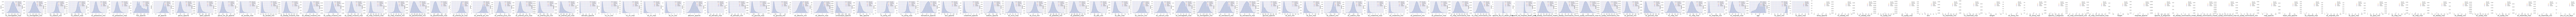

In [438]:
UVA_numeric(df7, continuous_feature_with_float)

In [439]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

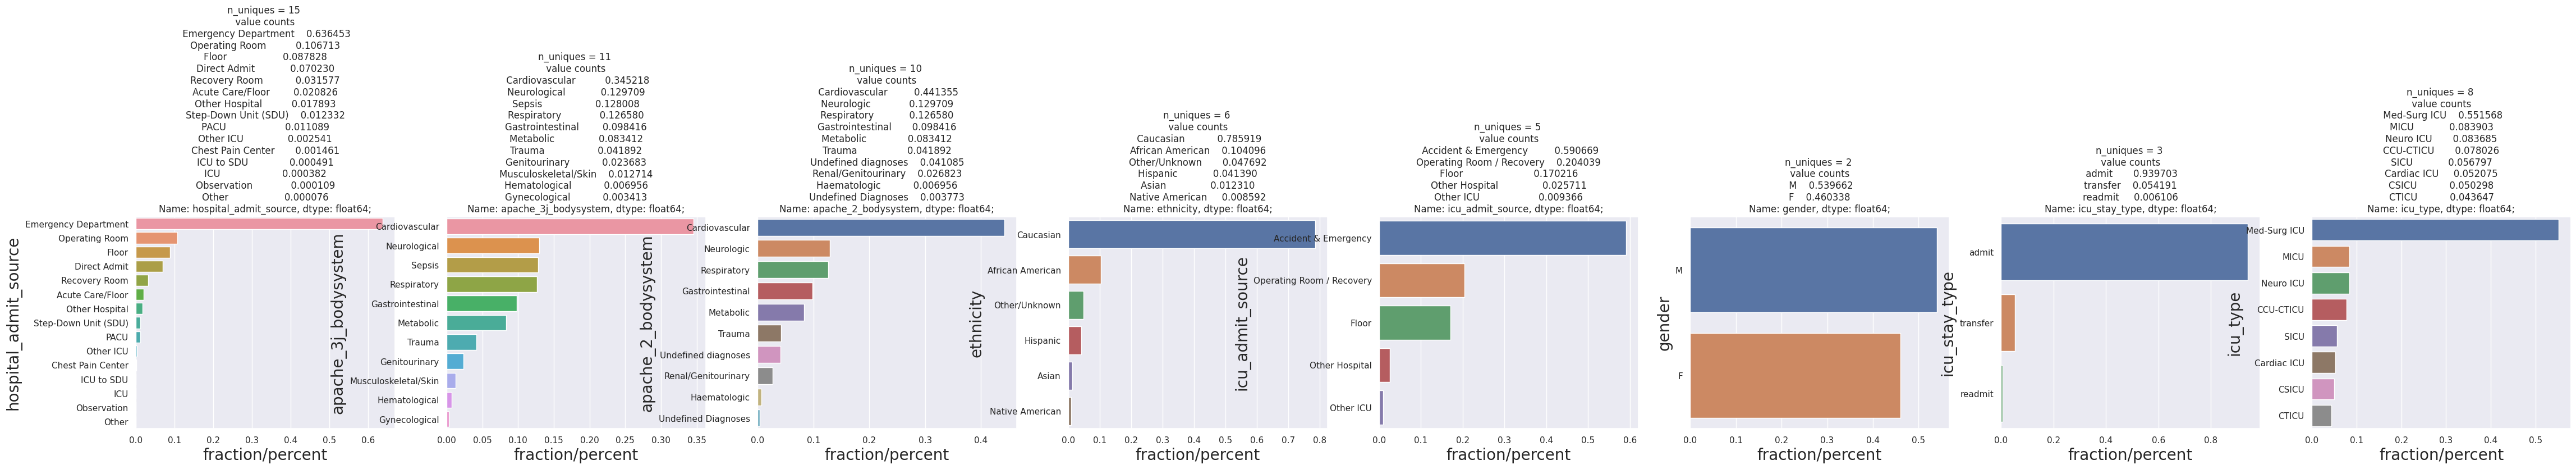

In [442]:
# Custom function for easy visualisation of Categorical Variables
UVA_category(df7, categorical_feature_with_obj)

In [443]:
#size = len(continuous_feature_with_float)
#size

In [330]:
#quant25 = df7['h1_hemaglobin_max'].quantile(0.25)
#quant25

9.82

In [331]:
#quant75 = df7['h1_hemaglobin_max'].quantile(0.75)
#quant75

12.49

In [332]:
#IQR = quant75 - quant25
#IQR

2.67

In [334]:
##med = df7['h1_hemaglobin_max'].median()
#whis_low = med-(1.5*IQR)
#whis_high = med+(1.5*IQR)

#print("med", med)
##print("whis_low", whis_low)
##print("whis_high", whis_high)

med 11.117391304347827
whis_low 7.112391304347827
whis_high 15.122391304347826


In [337]:
#outlier_high = len(df7['h1_hemaglobin_max'][df7['h1_hemaglobin_max']>whis_high])
#outlier_low = len(df7['h1_hemaglobin_max'][df7['h1_hemaglobin_max']<whis_low])
#print("outlier_high",outlier_high)
#print("outlier_low",outlier_low)

outlier_high 2260
outlier_low 1826


In [444]:
# checking out liers
#lets analyze outliers
# Outliers detection 
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))

      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


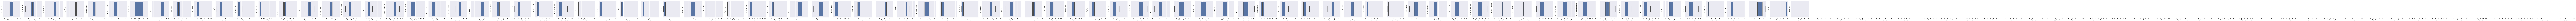

In [445]:
UVA_outlier(df7, continuous_feature_with_float,)

True


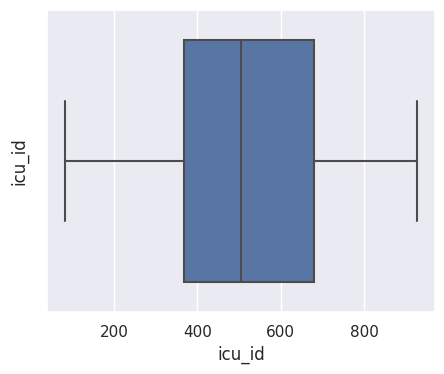

In [446]:
UVA_outlier(df7, continuous_feature_with_int,)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


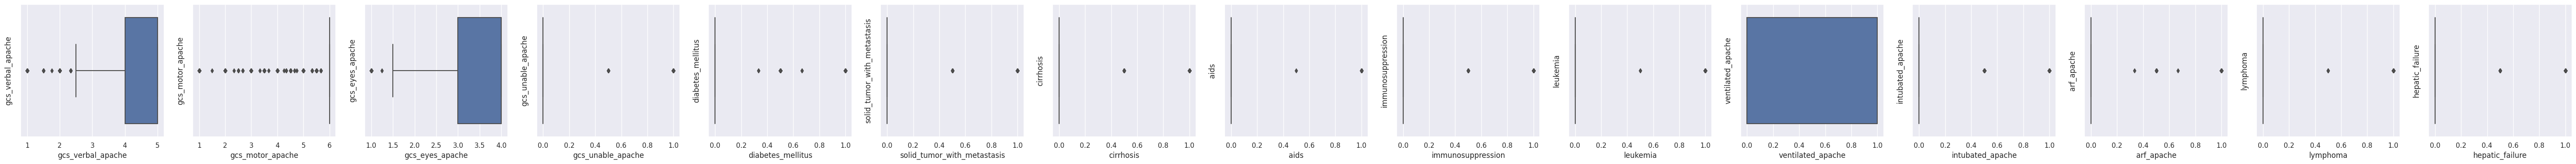

In [447]:
UVA_outlier(df7, discrete_feature_with_float,)

True
True
True
True


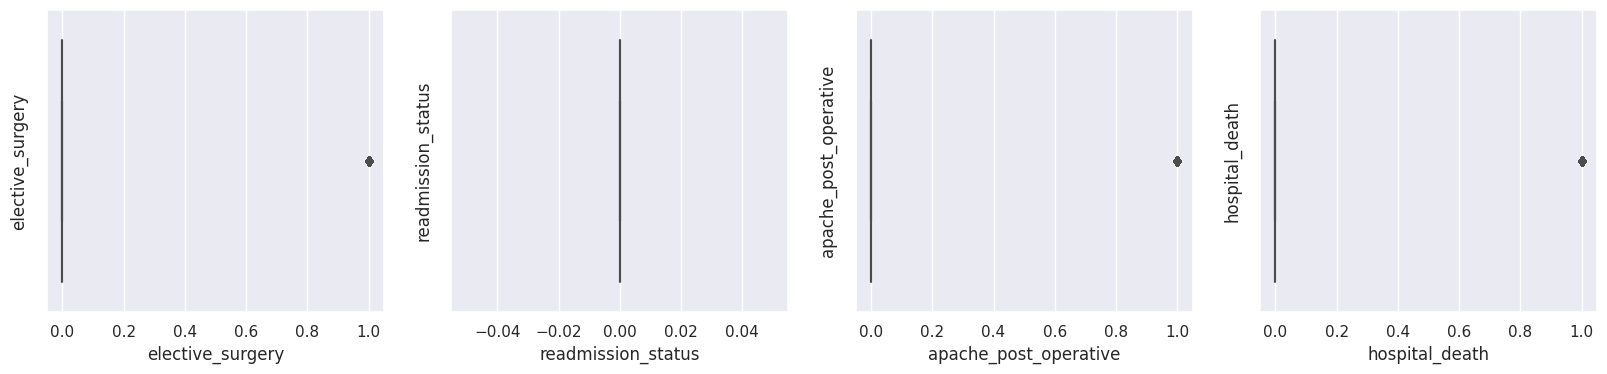

In [448]:
UVA_outlier(df7, discrete_feature_with_int,)

In [449]:
def cap_data(df7):
    for col in df7.columns:
        print("capping the ",col)
        if (((df7[col].dtype)=='float64') | ((df7[col].dtype)=='int64')):
            percentiles = df7[col].quantile([0.01,0.99]).values
            df7[col][df7[col] <= percentiles[0]] = percentiles[0]
            df7[col][df7[col] >= percentiles[1]] = percentiles[1]
        else:
            df7[col]=df7[col]
    return df7

final_df=cap_data(df7)

capping the  h1_hemaglobin_max
capping the  h1_hemaglobin_min
capping the  h1_sodium_min
capping the  h1_sodium_max
capping the  h1_potassium_min
capping the  h1_potassium_max
capping the  fio2_apache
capping the  ph_apache
capping the  paco2_apache
capping the  pao2_apache
capping the  paco2_for_ph_apache
capping the  d1_lactate_max
capping the  d1_lactate_min
capping the  d1_diasbp_invasive_max
capping the  d1_diasbp_invasive_min
capping the  d1_sysbp_invasive_min
capping the  d1_sysbp_invasive_max
capping the  d1_mbp_invasive_max
capping the  d1_mbp_invasive_min
capping the  d1_pao2fio2ratio_min
capping the  d1_pao2fio2ratio_max
capping the  d1_arterial_ph_max
capping the  d1_arterial_ph_min
capping the  d1_arterial_pco2_min
capping the  d1_arterial_pco2_max
capping the  d1_arterial_po2_min
capping the  d1_arterial_po2_max
capping the  bilirubin_apache
capping the  h1_inr_min
capping the  h1_inr_max
capping the  d1_inr_max
capping the  d1_inr_min
capping the  albumin_apache
capping 

In [450]:
final_data = final_df.copy()

In [451]:
final_data.shape

(91713, 149)

##Feature Encoding

In [452]:
#Categorical Encoding
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
final_df['gender']= label_encoder.fit_transform(final_df['gender'])
 
final_df['gender'].unique()

array([1, 0])

In [453]:
# One Hot encode
# Get one hot encoding of columns B
one_hot = pd.get_dummies(final_df['icu_stay_type'])

In [454]:
type(one_hot)

pandas.core.frame.DataFrame

In [457]:
# Drop column B as it is now encoded
final_df = final_df.drop('icu_stay_type',axis = 1)

In [458]:
# Join the encoded df
final_df = final_df.join(one_hot)  

In [459]:
# Get one hot encoding of columns B
one_hot1 = pd.get_dummies(final_df['icu_admit_source'])
# Drop column B as it is now encoded
final_df = final_df.drop('icu_admit_source',axis = 1)
# Join the encoded df
final_df = final_df.join(one_hot1)

In [460]:
final_df.shape

(91713, 155)

In [461]:
categorical_features2=[feature for feature in final_df.columns if final_df[feature].dtypes=='O']

In [462]:
final_df[categorical_features2].head()

hospital_admit_source apache_3j_bodysystem apache_2_bodysystem  ethnicity  \
0                 Floor               Sepsis      Cardiovascular  Caucasian   
1                 Floor          Respiratory         Respiratory  Caucasian   
2  Emergency Department            Metabolic           Metabolic  Caucasian   
3        Operating Room       Cardiovascular      Cardiovascular  Caucasian   
4  Emergency Department               Trauma              Trauma  Caucasian   

       icu_type  
0         CTICU  
1  Med-Surg ICU  
2  Med-Surg ICU  
3         CTICU  
4  Med-Surg ICU

In [463]:
# Frequency encode
# frequency encode
df_frq_map=final_df['ethnicity'].value_counts().to_dict() 
final_df['ethnicity'] = final_df['ethnicity'].map(df_frq_map)

In [464]:
df_frq_map=final_df['hospital_admit_source'].value_counts().to_dict() 
final_df['hospital_admit_source'] = final_df['hospital_admit_source'].map(df_frq_map)

In [465]:
df_frq_map=final_df['icu_type'].value_counts().to_dict() 
final_df['icu_type'] = final_df['icu_type'].map(df_frq_map)

In [466]:
df_frq_map=final_df['apache_3j_bodysystem'].value_counts().to_dict() 
final_df['apache_3j_bodysystem'] = final_df['apache_3j_bodysystem'].map(df_frq_map)

In [467]:
df_frq_map=final_df['apache_2_bodysystem'].value_counts().to_dict() 
final_df['apache_2_bodysystem'] = final_df['apache_2_bodysystem'].map(df_frq_map)

In [468]:
print("List of Object values",list(final_df.select_dtypes(['object']).columns))

List of Object values []


In [470]:
final_df.head()

h1_hemaglobin_max  h1_hemaglobin_min  h1_sodium_min  h1_sodium_max  \
0              11.30              11.30          145.0          145.0   
1              11.30              11.30          145.0          145.0   
2              11.45              11.45          143.0          143.0   
3              11.60              11.60          141.0          141.0   
4              11.30              11.30          139.0          139.0   

   h1_potassium_min  h1_potassium_max  fio2_apache  ph_apache  paco2_apache  \
0               4.2               4.2     1.000000       7.45     37.000000   
1               4.2               4.2     1.000000       7.45     37.000000   
2               4.2               4.2     0.800000       7.42     33.500000   
3               4.2               4.2     0.600000       7.39     30.000000   
4               4.2               4.2     0.733333       7.40     34.333333   

   pao2_apache  paco2_for_ph_apache  d1_lactate_max  d1_lactate_min  \
0         51.0            37.000000        1.300000        1.000000   
1         51.0            37.000000        3.500000        3.500000   
2         96.5            33.500000        3.842857        3.842857   
3        142.0            30.000000        4.185714        4.185714   
4        218.0            34.333333        4.528571        4.528571   

   d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_sysbp_invasive_min  \
0               46.000000               32.000000              64.000000   
1               51.333333               31.333333              68.666667   
2               56.666667               30.666667              73.333333   
3               62.000000               30.000000              78.000000   
4               77.000000               41.666667              90.666667   

   d1_sysbp_invasive_max  d1_mbp_invasive_max  d1_mbp_invasive_min  \
0                  122.0            66.000000            40.000000   
1                  136.0            74.666667            44.000000   
2                  150.0            83.333333            48.000000   
3                  164.0            92.000000            52.000000   
4                  173.0           107.333333            62.666667   

   d1_pao2fio2ratio_min  d1_pao2fio2ratio_max  d1_arterial_ph_max  \
0             55.000000             81.926667            7.450000   
1             55.000000             81.926667            7.450000   
2            143.833333            198.650000            7.445000   
3            236.666667            342.500000            7.440000   
4            281.111111            351.666667            7.433333   

   d1_arterial_ph_min  d1_arterial_pco2_min  d1_arterial_pco2_max  \
0            7.450000             37.000000                  37.0   
1            7.450000             37.000000                  37.0   
2            7.395000             32.000000                  37.0   
3            7.340000             27.000000                  37.0   
4            7.366667             32.333333                  39.0   

   d1_arterial_po2_min  d1_arterial_po2_max  bilirubin_apache  h1_inr_min  \
0            51.000000                 56.0             0.400         1.3   
1            51.000000                 56.0             0.375         1.3   
2            76.500000                194.0             0.350         1.2   
3           102.000000                337.0             0.325         1.1   
4           191.333333                348.0             0.300         1.1   

   h1_inr_max  d1_inr_max  d1_inr_min  albumin_apache  d1_bilirubin_max  \
0        1.30        1.30         1.3            2.30          0.400000   
1        1.30        1.30         1.3            2.35          0.500000   
2        1.45        1.45         1.2            2.40          0.457143   
3        1.60        1.60         1.1            2.45          0.414286   
4        1.35        1.35         1.1            2.50          0.371429   

   d1_bilirubin_min  h1_glucose_max  h1_

In [474]:
#Lets drop Id's
# LETS DROP READMISSION STATUS 
final_df.drop('readmission_status',inplace=True,axis=1)

final_df.drop('icu_id',inplace=True,axis=1)

In [475]:
final_df.shape

(91713, 153)

## Train and Test Split

In [476]:
# Spliting data train and test 
X= final_df.drop(['hospital_death'],axis=1)
y=final_df['hospital_death']

In [478]:
type(X)

pandas.core.frame.DataFrame

In [479]:
type(y)

pandas.core.series.Series

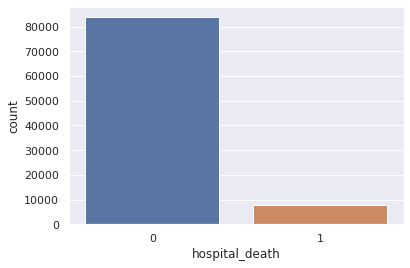

In [481]:
sns.countplot(final_df['hospital_death'])

In [482]:
final_df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

##Its imbalanced dataset

**class(0)-    83798**

**class(1)-     7915**

# Splitting the data into Train and Validation set

In [483]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, random_state=11, stratify = y)

In [484]:
type(xtrain)

pandas.core.frame.DataFrame

##Machine learning Alorithm part

**Logistics regression**

KeyError: ignored

In [300]:
discrete_columns=df7[discrete_feature].columns
discrete_columns

Index(['gcs_verbal_apache', 'gcs_motor_apache', 'gcs_eyes_apache',
       'gcs_unable_apache', 'diabetes_mellitus', 'solid_tumor_with_metastasis',
       'cirrhosis', 'aids', 'immunosuppression', 'leukemia',
       'ventilated_apache', 'intubated_apache', 'arf_apache', 'lymphoma',
       'hepatic_failure', 'elective_surgery', 'readmission_status',
       'apache_post_operative', 'hospital_death'],
      dtype='object')

In [228]:
continuous_columns=df7[continuous_feature].columns
continuous_columns

Index(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max', 'fio2_apache',
       'ph_apache', 'paco2_apache', 'pao2_apache',
       ...
       'd1_mbp_min', 'd1_mbp_max', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'pre_icu_los_days', 'icu_id'],
      dtype='object', length=122)

In [229]:

categorical_columns=df7[categorical_features].columns
categorical_columns

Index(['hospital_admit_source', 'apache_3j_bodysystem', 'apache_2_bodysystem',
       'ethnicity', 'icu_admit_source', 'gender', 'icu_stay_type', 'icu_type'],
      dtype='object')

In [230]:
df7[discrete_feature].head(20)

gcs_verbal_apache  gcs_motor_apache  gcs_eyes_apache  gcs_unable_apache  \
0                 4.0               6.0              3.0                0.0   
1                 1.0               3.0              1.0                0.0   
2                 5.0               6.0              3.0                0.0   
3                 5.0               6.0              4.0                0.0   
4                 5.0               6.0              4.0                0.0   
5                 5.0               6.0              4.0                0.0   
6                 5.0               6.0              4.0                0.0   
7                 5.0               6.0              4.0                0.0   
8                 5.0               6.0              4.0                0.0   
9                 5.0               6.0              4.0                0.0   
10                5.0               6.0              4.0                0.0   
11                4.0               6.0              4.0                0.0   
12                5.0               6.0              4.0                0.0   
13                5.0               6.0              4.0                0.0   
14                5.0               6.0              4.0                0.0   
15                5.0               6.0              4.0                0.0   
16                5.0               6.0              4.0                0.0   
17                1.0               4.0              1.0                0.0   
18                4.0               6.0              4.0                0.0   
19                5.0               6.0              4.0                0.0   

    diabetes_mellitus  solid_tumor_with_metastasis  cirrhosis  aids  \
0                 1.0                          0.0        0.0   0.0   
1                 1.0                          0.0        0.0   0.0   
2                 0.0                          0.0        0.0   0.0   
3                 0.0                          0.0        0.0   0.0   
4                 0.0                          0.0        0.0   0.0   
5                 1.0                          0.0        0.0   0.0   
6                 1.0                          0.0        0.0   0.0   
7                 0.0                          0.0        0.0   0.0   
8                 0.0                          0.0        0.0   0.0   
9                 0.0                          0.0        0.0   0.0   
10                0.0                          0.0        0.0   0.0   
11                0.0                          0.0        0.0   0.0   
12                0.0                          0.0        0.0   0.0   
13                0.0                          0.0        0.0   0.0   
14                0.0                          0.0        0.0   0.0   
15                1.0                          0.0        0.0   0.0   
16                0.0                          0.0        0.0   0.0   
17                0.0                          0.0        0.0   0.0   
18                0.0                          0.0        0.0   0.0   
19                0.0                          0.0        0.0   0.0   

    immunosuppression  leukemia  ventilated_apache  intubated_apache  \
0                 0.0       0.0                0.0               0.0   
1                 0.0       0.0                1.0               0.0   
2                 0.0       0.0                0.0               0.0   
3                 0.0       0.0                1.0               1.0   
4                 0.0       0.0                0.0               0.0   
5                 0.0       0.0                0.0               0.0   
6                 0.0       0.0                1.0               1.0   
7                 1.0       0.0                1.0               0.0   
8                 0.0       0.0                1.0               0.0   
9                 0.0       0.0                0.0               0.0   
10                1.0       0.0                0.0          

In [237]:
df7.head(20)

h1_hemaglobin_max  h1_hemaglobin_min  h1_sodium_min  h1_sodium_max  \
0           11.300000          11.300000     145.000000     145.000000   
1           11.300000          11.300000     145.000000     145.000000   
2           11.450000          11.450000     143.000000     143.000000   
3           11.600000          11.600000     141.000000     141.000000   
4           11.300000          11.300000     139.000000     139.000000   
5           11.000000          11.000000     137.000000     137.000000   
6           10.700000          10.700000     135.000000     135.000000   
7           11.500000          11.500000     138.500000     138.500000   
8           12.300000          12.300000     142.000000     142.000000   
9           12.800000          12.800000     139.000000     139.000000   
10          12.742857          12.742857     139.285714     139.285714   
11          12.685714          12.685714     139.571429     139.571429   
12          12.628571          12.628571     139.857143     139.857143   
13          12.571429          12.571429     140.142857     140.142857   
14          12.514286          12.514286     140.428571     140.428571   
15          12.457143          12.457143     140.714286     140.714286   
16          12.400000          12.400000     141.000000     141.000000   
17          12.400000          12.400000     141.714286     141.714286   
18          12.400000          12.400000     142.428571     142.428571   
19          12.400000          12.400000     143.142857     143.142857   

    h1_potassium_min  h1_potassium_max  fio2_apache  ph_apache  paco2_apache  \
0           4.200000          4.200000     1.000000   7.450000     37.000000   
1           4.200000          4.200000     1.000000   7.450000     37.000000   
2           4.200000          4.200000     0.800000   7.420000     33.500000   
3           4.200000          4.200000     0.600000   7.390000     30.000000   
4           4.200000          4.200000     0.733333   7.400000     34.333333   
5           4.200000          4.200000     0.866667   7.410000     38.666667   
6           4.200000          4.200000     1.000000   7.420000     43.000000   
7           4.700000          4.700000     1.000000   7.280000     51.500000   
8           5.200000          5.200000     1.000000   7.140000     60.000000   
9           3.300000          3.300000     0.933333   7.163333     58.555556   
10          3.414286          3.414286     0.866667   7.186667     57.111111   
11          3.528571          3.528571     0.800000   7.210000     55.666667   
12          3.642857          3.642857     0.733333   7.233333     54.222222   
13          3.757143          3.757143     0.666667   7.256667     52.777778   
14          3.871429          3.871429     0.600000   7.280000     51.333333   
15          3.985714          3.985714     0.533333   7.303333     49.888889   
16          4.100000          4.100000     0.466667   7.326667     48.444444   
17          4.000000          4.000000     0.400000   7.350000     47.000000   
18          3.900000          3.900000     0.700000   7.305000     48.500000   
19          3.800000          3.800000     1.000000   7.260000     50.000000   

    pao2_apache  paco2_for_ph_apache  d1_lactate_max  d1_lactate_min  \
0     51.000000            37.000000        1.300000        1.000000   
1     51.000000            37.000000        3.500000        3.500000   
2     96.500000            33.500000        3.842857        3.842857   
3    142.000000            30.000000        4.185714        4.185714   
4    218.000000            34.333333        4.528571        4.528571   
5    294.000000            38.666667        4.871429        4.871429   
6    370.000000            43.000000        5.214286        5.214286   
7    231.000000            51.500000        5.557143        5.557143   
8     92.000000            60.000000        5.900000        5.900000   
9     97.444444            58.555556        5.15

#APPROACH 2)

In [ ]:
df3.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df3)
mis_val_percent

hospital_death                    0.000000
age                               4.610033
bmi                               3.738837
elective_surgery                  0.000000
ethnicity                         1.521049
gender                            0.027259
height                            1.454538
hospital_admit_source            23.343474
icu_admit_source                  0.122120
icu_id                            0.000000
icu_stay_type                     0.000000
icu_type                          0.000000
pre_icu_los_days                  0.000000
readmission_status                0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
apache_post_operative             0.000000
arf_apache                        0.779606
bilirubin_apache                 63.386870
bun_apache                       21.002475
creatinine_apache                20.556519
fio2_apache

In [ ]:
column=df3.columns
mis_val = df3.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df3)
data_type = df3.dtypes


#mis_val_table = pd.concat([columns, mis_val, mis_val_percent,data_type], axis=1)

In [ ]:
print(type(column))
print(type(mis_val))
print(type(mis_val_percent))
print(type(data_type))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
print(len(column))
print(len(mis_val))
print(len(mis_val_percent))
print(len(data_type))

183
183
183
183


###(columns) is <class 'pandas.core.indexes.base.Index'> so we should convert it to Series using [idx.to_series()] method


In [ ]:
column1=column.to_series()

In [ ]:
print(type(column1))

<class 'pandas.core.series.Series'>


In [ ]:
mis_val_table = pd.concat([column1, mis_val, mis_val_percent,data_type], axis=1)

In [ ]:
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'column1', 1 : 'Missing Values', 2 : '% of Total Values',3:'Data_Types'})

In [ ]:
type(mis_val_table_ren_columns)

pandas.core.frame.DataFrame

In [ ]:
mis_val_table_ren_columns.columns

Index(['column1', 'Missing Values', '% of Total Values', 'Data_Types'], dtype='object')

In [ ]:
mis_val_table_ren_columns.head()

column1  Missing Values  % of Total Values  \
hospital_death      hospital_death               0           0.000000   
age                            age            4228           4.610033   
bmi                            bmi            3429           3.738837   
elective_surgery  elective_surgery               0           0.000000   
ethnicity                ethnicity            1395           1.521049   

                 Data_Types  
hospital_death        int64  
age                 float64  
bmi                 float64  
elective_surgery      int64  
ethnicity            object

In [ ]:
# mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0]
            #train_df_mv_norm.iloc[:,1:] will select all rows but your first column will be excluded.
            #MEANS HERE IN THEFIRST COLOMN LIKE age, bmi, ethnicity THAT VALUE SHOULD NOT BE ZERO THATS WHY THEY ARE USING 
            # iloc[:,1] != 0] 

columns  Missing Values  \
age                                                      age            4228   
bmi                                                      bmi            3429   
ethnicity                                          ethnicity            1395   
gender                                                gender              25   
height                                                height            1334   
hospital_admit_source                  hospital_admit_source           21409   
icu_admit_source                            icu_admit_source             112   
weight                                                weight            2720   
albumin_apache                                albumin_apache           54379   
apache_2_diagnosis                        apache_2_diagnosis            1662   
apache_3j_diagnosis                      apache_3j_diagnosis            1101   
arf_apache                                        arf_apache             715   
bilirubin_apache                            bilirubin_apache           58134   
bun_apache                                        bun_apache           19262   
creatinine_apache                          creatinine_apache           18853   
fio2_apache                                      fio2_apache           70868   
gcs_eyes_apache                              gcs_eyes_apache            1901   
gcs_motor_apache                            gcs_motor_apache            1901   
gcs_unable_apache                          gcs_unable_apache            1037   
gcs_verbal_apache                          gcs_verbal_apache            1901   
glucose_apache                                glucose_apache           11036   
heart_rate_apache                          heart_rate_apache             878   
hematocrit_apache                          hematocrit_apache           19878   
intubated_apache                            intubated_apache             715   
map_apache                                        map_apache             994   
paco2_apache                                    paco2_apache           70868   
paco2_for_ph_apache                      paco2_for_ph_apache           70868   
pao2_apache                                      pao2_apache           70868   
ph_apache                                          ph_apache           70868   
resprate_apache                              resprate_apache            1234   
sodium_apache                                  sodium_apache           18600   
temp_apache                                      temp_apache            4108   
urineoutput_apache                        urineoutput_apache           48998   
ventilated_apache                          ventilated_apache             715   
wbc_apache                                        wbc_apache           22012   
d1_diasbp_invasive_max                d1_diasbp_invasive_max           67984   
d1_diasbp_invasive_min                d1_diasbp_invasive_min           67984   
d1_diasbp_max                                  d1_diasbp_max             165   
d1_diasbp_min                                  d1_diasbp_min             165   
d1_diasbp_noninvasive_max          d1_diasbp_noninvasive_max            1040   
d1_diasbp_noninvasive_min          d1_diasbp_noninvasive_min            1040   
d1_heartrate_max                            d1_heartrate_max             145   
d1_heartrate_min                            d1_heartrate_min             145   
d1_mbp_invasive_max                      d1_mbp_invasive_max           67777   
d1_mbp_invasive_min                      d1_mbp_invasive_min           67777   
d1_mbp_max                                        d1_mbp_max             220   
d1_mbp_min                                        d1_mbp_min             220   
d1_mbp_noninvasive_max                d1_mbp_noninvasive_max            1479   
d1_mbp_noninvasive_min                d1_mbp_noninvasive_min            1479   
d1_resprate_max                              d1_respr

In [ ]:
#mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False)
mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False)

column1  Missing Values  \
h1_bilirubin_min                            h1_bilirubin_min           84619   
h1_bilirubin_max                            h1_bilirubin_max           84619   
h1_lactate_min                                h1_lactate_min           84369   
h1_lactate_max                                h1_lactate_max           84369   
h1_albumin_max                                h1_albumin_max           83824   
h1_albumin_min                                h1_albumin_min           83824   
h1_pao2fio2ratio_min                    h1_pao2fio2ratio_min           80195   
h1_pao2fio2ratio_max                    h1_pao2fio2ratio_max           80195   
h1_arterial_ph_min                        h1_arterial_ph_min           76424   
h1_arterial_ph_max                        h1_arterial_ph_max           76424   
h1_hco3_min                                      h1_hco3_min           76094   
h1_hco3_max                                      h1_hco3_max           76094   
h1_arterial_pco2_min                    h1_arterial_pco2_min           75959   
h1_arterial_pco2_max                    h1_arterial_pco2_max           75959   
h1_wbc_max                                        h1_wbc_max           75953   
h1_wbc_min                                        h1_wbc_min           75953   
h1_arterial_po2_max                      h1_arterial_po2_max           75945   
h1_arterial_po2_min                      h1_arterial_po2_min           75945   
h1_calcium_max                                h1_calcium_max           75863   
h1_calcium_min                                h1_calcium_min           75863   
h1_platelets_max                            h1_platelets_max           75673   
h1_platelets_min                            h1_platelets_min           75673   
h1_bun_min                                        h1_bun_min           75091   
h1_bun_max                                        h1_bun_max           75091   
h1_creatinine_min                          h1_creatinine_min           74957   
h1_creatinine_max                          h1_creatinine_max           74957   
h1_diasbp_invasive_min                h1_diasbp_invasive_min           74928   
h1_diasbp_invasive_max                h1_diasbp_invasive_max           74928   
h1_sysbp_invasive_min                  h1_sysbp_invasive_min           74915   
h1_sysbp_invasive_max                  h1_sysbp_invasive_max           74915   
h1_mbp_invasive_max                      h1_mbp_invasive_max           74844   
h1_mbp_invasive_min                      h1_mbp_invasive_min           74844   
h1_hematocrit_max                          h1_hematocrit_max           73420   
h1_hematocrit_min                          h1_hematocrit_min           73420   
h1_hemaglobin_max                          h1_hemaglobin_max           73123   
h1_hemaglobin_min                          h1_hemaglobin_min           73123   
h1_sodium_min                                  h1_sodium_min           72617   
h1_sodium_max                                  h1_sodium_max           72617   
h1_potassium_min                            h1_potassium_min           72102   
h1_potassium_max                            h1_potassium_max           72102   
fio2_apache                                      fio2_apache           70868   
ph_apache                                          ph_apache           70868   
paco2_apache                                    paco2_apache           70868   
pao2_apache                                      pao2_apache           70868   
paco2_for_ph_apache                      paco2_for_ph_apache           70868   
d1_lactate_max                                d1_lactate_max           68396   
d1_lactate_min                                d1_lactate_min           68396   
d1_diasbp_invasive_max                d1_diasbp_invasive_max           67984   
d1_diasbp_invasive_min                d1_diasbp_invasive_min           67984   
d1_sysbp_invasive_min                  d1_sysbp_invas

In [ ]:
 #mis_val_table_ren_columns =mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
 mis_val_table_ren_columns =mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)

In [ ]:
mis_val_table_ren_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   column1            183 non-null    object 
 1   Missing Values     183 non-null    int64  
 2   % of Total Values  183 non-null    float64
 3   Data_Types         183 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.1+ KB


In [ ]:
mis_val_table_ren_columns.tail()

column1  Missing Values  \
icu_stay_type                  icu_stay_type               0   
icu_type                            icu_type               0   
readmission_status        readmission_status               0   
apache_post_operative  apache_post_operative               0   
hospital_death                hospital_death               0   

                       % of Total Values Data_Types  
icu_stay_type                        0.0     object  
icu_type                             0.0     object  
readmission_status                   0.0      int64  
apache_post_operative                0.0      int64  
hospital_death                       0.0      int64

In [ ]:
mis_val_table_ren_columns.head()

column1  Missing Values  % of Total Values  \
h1_bilirubin_min  h1_bilirubin_min           84619               92.3   
h1_bilirubin_max  h1_bilirubin_max           84619               92.3   
h1_lactate_min      h1_lactate_min           84369               92.0   
h1_lactate_max      h1_lactate_max           84369               92.0   
h1_albumin_max      h1_albumin_max           83824               91.4   

                 Data_Types  
h1_bilirubin_min    float64  
h1_bilirubin_max    float64  
h1_lactate_min      float64  
h1_lactate_max      float64  
h1_albumin_max      float64

In [ ]:
mis_val_table_ren_columns.columns

Index(['column1', 'Missing Values', '% of Total Values', 'Data_Types'], dtype='object')

In [ ]:
mis_val_table_ren_columns.shape

(183, 4)

In [ ]:
mis_val_table_ren_columns.head(2)

column1  Missing Values  % of Total Values  \
h1_bilirubin_min  h1_bilirubin_min           84619               92.3   
h1_bilirubin_max  h1_bilirubin_max           84619               92.3   

                 Data_Types  
h1_bilirubin_min    float64  
h1_bilirubin_max    float64

In [ ]:
mis_val_table_ren_columns.shape

(183, 4)

In [ ]:
print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n""There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")

Your selected dataframe has 183 columns.
There are 183 columns that have missing values.


In [ ]:
mis_val_table_ren_columns.head()

column1  Missing Values  % of Total Values  \
h1_bilirubin_min  h1_bilirubin_min           84619               92.3   
h1_bilirubin_max  h1_bilirubin_max           84619               92.3   
h1_lactate_min      h1_lactate_min           84369               92.0   
h1_lactate_max      h1_lactate_max           84369               92.0   
h1_albumin_max      h1_albumin_max           83824               91.4   

                 Data_Types  
h1_bilirubin_min    float64  
h1_bilirubin_max    float64  
h1_lactate_min      float64  
h1_lactate_max      float64  
h1_albumin_max      float64

In [ ]:
mis_val_table_ren_columns['Missing Values']=mis_val_table_ren_columns['Missing Values'].astype(int)
mis_val_table_ren_columns['% of Total Values']=mis_val_table_ren_columns['% of Total Values'].astype(int)

In [ ]:
mis_val_table_ren_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, h1_bilirubin_min to hospital_death
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   column1            183 non-null    object
 1   Missing Values     183 non-null    int64 
 2   % of Total Values  183 non-null    int64 
 3   Data_Types         183 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.1+ KB


##Now we have list of columns which have descending order missing values % so start dropping those

In [ ]:
#df_filtered = df[df['Age'] >= 25]
#print(df_filtered.head(15)
# Print the shape of the dataframe
#print(df_filtered.shape)

mis_val_table_ren_columns.drop(mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'] >= 80].index, inplace = True)#
    

In [ ]:
mis_val_table_ren_columns.shape

(149, 4)

In [ ]:
mis_val_table_ren_columns.head(10)

column1  Missing Values  % of Total Values  \
h1_hemaglobin_max  h1_hemaglobin_max           73123                 79   
h1_hemaglobin_min  h1_hemaglobin_min           73123                 79   
h1_sodium_min          h1_sodium_min           72617                 79   
h1_sodium_max          h1_sodium_max           72617                 79   
h1_potassium_min    h1_potassium_min           72102                 78   
h1_potassium_max    h1_potassium_max           72102                 78   
fio2_apache              fio2_apache           70868                 77   
ph_apache                  ph_apache           70868                 77   
paco2_apache            paco2_apache           70868                 77   
pao2_apache              pao2_apache           70868                 77   

                  Data_Types  
h1_hemaglobin_max    float64  
h1_hemaglobin_min    float64  
h1_sodium_min        float64  
h1_sodium_max        float64  
h1_potassium_min     float64  
h1_potassium_max     float64  
fio2_apache          float64  
ph_apache            float64  
paco2_apache         float64  
pao2_apache          float64

In [ ]:
mis_val_table_ren_columns.tail()

column1  Missing Values  \
icu_stay_type                  icu_stay_type               0   
icu_type                            icu_type               0   
readmission_status        readmission_status               0   
apache_post_operative  apache_post_operative               0   
hospital_death                hospital_death               0   

                       % of Total Values Data_Types  
icu_stay_type                          0     object  
icu_type                               0     object  
readmission_status                     0      int64  
apache_post_operative                  0      int64  
hospital_death                         0      int64

In [ ]:
#reset the index
mis_val_table_ren_columns=mis_val_table_ren_columns.reset_index(drop=True)

In [ ]:
mis_val_table_ren_columns.head()

column1  Missing Values  % of Total Values Data_Types
0  h1_hemaglobin_max           73123                 79    float64
1  h1_hemaglobin_min           73123                 79    float64
2      h1_sodium_min           72617                 79    float64
3      h1_sodium_max           72617                 79    float64
4   h1_potassium_min           72102                 78    float64

In [ ]:
mis_val_table_ren_columns['column1'].values

array(['h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max',
       'fio2_apache', 'ph_apache', 'paco2_apache', 'pao2_apache',
       'paco2_for_ph_apache', 'd1_lactate_max', 'd1_lactate_min',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_sysbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min',
       'd1_pao2fio2ratio_min', 'd1_pao2fio2ratio_max',
       'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_pco2_min',
       'd1_arterial_pco2_max', 'd1_arterial_po2_min',
       'd1_arterial_po2_max', 'bilirubin_apache', 'h1_inr_min',
       'h1_inr_max', 'd1_inr_max', 'd1_inr_min', 'albumin_apache',
       'd1_bilirubin_max', 'd1_bilirubin_min', 'h1_glucose_max',
       'h1_glucose_min', 'd1_albumin_min', 'd1_albumin_max',
       'urineoutput_apache', 'wbc_apache', 'h1_temp_min', 'h1_temp_max',
       'hospital_admit_source', 'hematocrit_apache', 'b

In [ ]:
## considering the "mis_val_table_ren_columns" dataframe's first column that is COLUMNS 
#because after deleting all the values which are having more than 80% missing values now we should only consider 
# the columns that is dataframes columns list in the list values so we can take these columns list in df3 dataframe
column_list_with_removed_val=mis_val_table_ren_columns['column1'].values

In [ ]:
type(column_list_with_removed_val)

numpy.ndarray

In [ ]:
df3[column_list_with_removed_val].head()

h1_hemaglobin_max  h1_hemaglobin_min  h1_sodium_min  h1_sodium_max  \
0                NaN                NaN            NaN            NaN   
1               11.3               11.3          145.0          145.0   
2                NaN                NaN            NaN            NaN   
3               11.6               11.6            NaN            NaN   
4                NaN                NaN            NaN            NaN   

   h1_potassium_min  h1_potassium_max  fio2_apache  ph_apache  paco2_apache  \
0               NaN               NaN          NaN        NaN           NaN   
1               4.2               4.2          1.0       7.45          37.0   
2               NaN               NaN          NaN        NaN           NaN   
3               NaN               NaN          0.6       7.39          30.0   
4               NaN               NaN          NaN        NaN           NaN   

   pao2_apache  paco2_for_ph_apache  d1_lactate_max  d1_lactate_min  \
0          NaN                  NaN             1.3             1.0   
1         51.0                 37.0             3.5             3.5   
2          NaN                  NaN             NaN             NaN   
3        142.0                 30.0             NaN             NaN   
4          NaN                  NaN             NaN             NaN   

   d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_sysbp_invasive_min  \
0                    46.0                    32.0                   64.0   
1                     NaN                     NaN                    NaN   
2                     NaN                     NaN                    NaN   
3                    62.0                    30.0                   78.0   
4                     NaN                     NaN                    NaN   

   d1_sysbp_invasive_max  d1_mbp_invasive_max  d1_mbp_invasive_min  \
0                  122.0                 66.0                 40.0   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                  164.0                 92.0                 52.0   
4                    NaN                  NaN                  NaN   

   d1_pao2fio2ratio_min  d1_pao2fio2ratio_max  d1_arterial_ph_max  \
0                   NaN                   NaN                 NaN   
1             51.000000                  54.8                7.45   
2                   NaN                   NaN                 NaN   
3            236.666667                 342.5                7.44   
4                   NaN                   NaN                 NaN   

   d1_arterial_ph_min  d1_arterial_pco2_min  d1_arterial_pco2_max  \
0                 NaN                   NaN                   NaN   
1                7.45                  37.0                  37.0   
2                 NaN                   NaN                   NaN   
3                7.34                  27.0                  37.0   
4                 NaN                   NaN                   NaN   

   d1_arterial_po2_min  d1_arterial_po2_max  bilirubin_apache  h1_inr_min  \
0                  NaN                  NaN               0.4         NaN   
1                 51.0                 51.0               NaN         1.3   
2                  NaN                  NaN               NaN         NaN   
3                102.0                337.0               NaN         1.1   
4                  NaN                  NaN               NaN         NaN   

   h1_inr_max  d1_inr_max  d1_inr_min  albumin_apache  d1_bilirubin_max  \
0         NaN         NaN         NaN             2.3               0.4   
1         1.3         1.3         1.3             NaN               0.5   
2         NaN         NaN         NaN             NaN               NaN   
3         1.6         1.6         1.1             NaN               NaN   
4         NaN         NaN         NaN             NaN               NaN   

   d1_bilirubin_min  h1_glucose_max  h1_

In [ ]:
df3[column_list_with_removed_val].shape

(91713, 149)

In [ ]:
df5=df3[column_list_with_removed_val]

ValueError                                Traceback (most recent call last)
<ipython-input-21-a97566e4d887> in <module>()
----> 1 for Miss_values, Total_values, Data_types in mis_val_table_ren_columns.iterrows():
      2   print(Miss_values, Total_values, Data_types)
      3   print()

ValueError: not enough values to unpack (expected 3, got 2)

Ans: 1. First should understand the error meaning

Error not enough values to unpack (expected 3, got 2) means:

a 2 part tuple, but assign to 3 values